## 1. Imports Needed

In [1]:
# This file needs to be put in the PythonAPI directory after downloading the coco tools from 
# https://github.com/cocodataset/cocoapi

In [2]:
import os
import glob
import ntpath
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pickle

from nltk import FreqDist
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration
from sklearn.neighbors import kneighbors_graph
from sklearn.feature_extraction.text import CountVectorizer
from pycocotools.coco import COCO

## 2. Directories needed

In [3]:
dataDir='..'
dataType='train2014'
ins_annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)
cap_annFile='%s/annotations/captions_%s.json'%(dataDir,dataType)
tarDir  = "/media/nourhan/3A5485F35485B265/Engineering/MSCOCO/Aysha/%s" % (dataType)
kmOutputDir = '/home/nourhan/Documents/kmOutput'

## 3. Read images' filenames

In [4]:
## get filenames in image directory
file_names = [ntpath.basename(file_name) for file_name in glob.glob(tarDir + '/*')]
print(len(file_names))

82783


## 4. Read Annotation files

In [5]:
coco_cap = COCO(cap_annFile)
cap_anns = coco_cap.loadAnns(coco_cap.getAnnIds())

coco_ins = COCO(ins_annFile)
ins_anns = coco_ins.loadAnns(coco_ins.getAnnIds())

loading annotations into memory...
Done (t=2.13s)
creating index...
index created!
loading annotations into memory...
Done (t=73.73s)
creating index...
index created!


## 5. Get the images, categories and annotation data

In [6]:
cats = coco_ins.loadCats(coco_ins.getCatIds())
imgs = coco_ins.loadImgs(coco_ins.getImgIds())

## 6. Map images' ids to filenames, captions and labels

In [7]:
id_file_names = {}
id_captions = {}
id_cat_names = {}
id_cat_labels = {}
cat_labels = {}

for img in imgs:
	if img['file_name'] in file_names:
		id_file_names[img['id']] = img['file_name']
		id_captions[img['id']] = []
		id_cat_labels[img['id']] = []
		id_cat_names[img['id']] = []
        
freq_cat_labels = {}
for ann in ins_anns:
	if ann['image_id'] in id_file_names:
		# print("cur image_id: " , ann['image_id'], ", category id: ", ann['category_id'])
		if ann['category_id'] not in cat_labels:
		# if ann['category_id'] not in catid_names:
			cat_labels[ann['category_id']] = len(cat_labels)
			freq_cat_labels[cat_labels[ann['category_id']]] = 1
# 		if cat_labels[ann['category_id']] not in id_cat_labels[ann['image_id']]:
		# if catid_names[ann['category_id']] not in id_cat_names[ann['image_id']]:
		id_cat_labels[ann['image_id']].append(cat_labels[ann['category_id']])
			# id_cat_names[ann['image_id']].append(catid_names[ann['category_id']])
		freq_cat_labels[cat_labels[ann['category_id']]] += 1
            
catid_names = {}
for cat in cats:
	if cat['id'] in cat_labels:
		catid_names[cat_labels[cat['id']]] = cat['name']

for k in id_cat_names:
	for label in id_cat_labels[k]:
		id_cat_names[k].append(catid_names[label])

for ann in cap_anns:
	if ann['image_id'] in id_captions:
		id_captions[ann['image_id']].append(ann['caption'])

In [8]:
print('all ids:', len(id_file_names))
# print('all filenames:', len(all_filenames))
print('all labels:', len(id_cat_labels))
print('all cat names:', len(id_cat_names))
print('all captions:', len(id_captions))
print('no. of categories names:', len(catid_names))
print(freq_cat_labels)

all ids: 82783
all labels: 82783
all cat names: 82783
all captions: 82783
no. of categories names: 80
{0: 2024, 1: 3775, 2: 5919, 3: 4037, 4: 7291, 5: 3302, 6: 4667, 7: 6655, 8: 5687, 9: 16984, 10: 4114, 11: 27148, 12: 11168, 13: 4956, 14: 30786, 15: 6022, 16: 3834, 17: 4328, 18: 3160, 19: 7591, 20: 185317, 21: 1373, 22: 7866, 23: 4498, 24: 4393, 25: 3090, 26: 2906, 27: 4461, 28: 1876, 29: 4329, 30: 1378, 31: 7051, 32: 9160, 33: 1317, 34: 834, 35: 6752, 36: 3906, 37: 904, 38: 3686, 39: 3597, 40: 1863, 41: 4699, 42: 1961, 43: 6561, 44: 2401, 45: 2690, 46: 4013, 47: 4162, 48: 3412, 49: 5619, 50: 14514, 51: 3919, 52: 5537, 53: 4288, 54: 10065, 55: 6913, 56: 4309, 57: 4598, 58: 4928, 59: 5540, 60: 4002, 61: 4978, 62: 4552, 63: 2874, 64: 3416, 65: 1518, 66: 4123, 67: 1981, 68: 1190, 69: 2303, 70: 157, 71: 3934, 72: 17316, 73: 4624, 74: 1074, 75: 3443, 76: 136, 77: 6201, 78: 8779, 79: 4252}


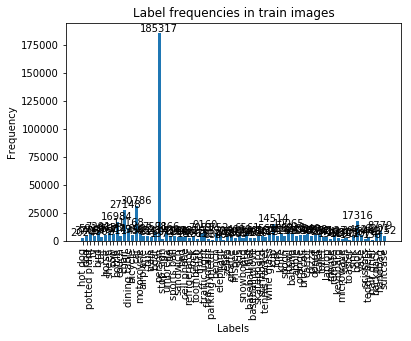

In [9]:
cat_labels_to_names = catid_names

x = np.arange(len(freq_cat_labels))
y = [freq_cat_labels[i] for i in range(len(freq_cat_labels))]
plt.bar(x, y)
plt.xticks(np.arange(len(freq_cat_labels)), cat_labels_to_names.values(), rotation='vertical')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label frequencies in train images')
for i in range(len(cat_labels)):
	plt.text(i, freq_cat_labels[i], '%d'%freq_cat_labels[i], ha='center', va='bottom')
plt.savefig('./labelsFreq.png')
plt.show()

In [10]:
print(catid_names)
print(cat_labels)

{0: 'hot dog', 1: 'dog', 2: 'potted plant', 3: 'tv', 4: 'bird', 5: 'cat', 6: 'horse', 7: 'sheep', 8: 'cow', 9: 'bottle', 10: 'couch', 11: 'chair', 12: 'dining table', 13: 'bicycle', 14: 'car', 15: 'motorcycle', 16: 'airplane', 17: 'bus', 18: 'train', 19: 'boat', 20: 'person', 21: 'stop sign', 22: 'umbrella', 23: 'tie', 24: 'sports ball', 25: 'sandwich', 26: 'bed', 27: 'cell phone', 28: 'refrigerator', 29: 'clock', 30: 'toothbrush', 31: 'truck', 32: 'traffic light', 33: 'fire hydrant', 34: 'parking meter', 35: 'bench', 36: 'elephant', 37: 'bear', 38: 'zebra', 39: 'giraffe', 40: 'frisbee', 41: 'skis', 42: 'snowboard', 43: 'kite', 44: 'baseball bat', 45: 'baseball glove', 46: 'skateboard', 47: 'surfboard', 48: 'tennis racket', 49: 'wine glass', 50: 'cup', 51: 'fork', 52: 'knife', 53: 'spoon', 54: 'bowl', 55: 'banana', 56: 'apple', 57: 'orange', 58: 'broccoli', 59: 'carrot', 60: 'pizza', 61: 'donut', 62: 'cake', 63: 'toilet', 64: 'laptop', 65: 'mouse', 66: 'remote', 67: 'keyboard', 68: 'mi

## Trying to cluster the training images using k-means

### Defining helper functions

In [11]:
# a function that writes the filenames with the images' labels to file
def writeLabelsToFile(outputFilename, filenames, labels):
    print(outputFilename)
    with open(outputFilename, 'w') as f:
        f.write('filename*labels\n')
        for filename, label in zip(filenames, labels):
            f.write('%s*%s\n' %(filename, ",".join(label)))

# a function that writes the filenames with the images' captions to file
def writeCaptionsToFile(outputFilename, filenames, captions):
    print(outputFilename)
    with open(outputFilename, 'w') as f:
        f.write('filename*caption\n')
        for filename, captionList in zip(filenames, captions):
            for caption in captionList:
                f.write('%s*%s\n' %(filename, caption.strip()))
                
# a function that visualizes the labels' distribution among a cluster
def plotLabels(outputPlotName, outputFreqName, labels):
    fDist = FreqDist()
    total = 0
    for label in labels:
        for l in label:
            fDist[l] += 1
            total += 1
    labels = [k for k in fDist.keys()]
    sizes = [v for v in fDist.values()]
#     explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#     fig1, ax1 = plt.subplots()
#     ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    patches, texts = plt.pie(sizes, shadow=True, startangle=90)
    plt.axis('equal')
    plt.title('Label Frequencies')
    plt.legend(patches, labels=['%s, %1.1f %%' % (l, s*100 / total) for l, s in zip(labels, sizes)], loc='upper right', bbox_to_anchor=(1.02, 0))
    plt.savefig(outputPlotName, bbox_inches='tight')
    plt.show()
    
    f = FreqDist()
    for label in labels:
        f[len(label)] += 1
#     for k, v in f.items():
#         print('k: %d, v: %d' % (k, v))
#     print(f)
    plt.bar([k for k in f.keys()], [v for v in f.values()])
    plt.xticks(np.arange(len(f)), f.keys())
    plt.title('Labels\' sizes Frequencies')
    plt.savefig(outputFreqName)
    plt.show()
    
# a function that runs kmeans algorithm N times and saves the info of each cluster
def runKmeans(clusterer, data, filenames, captions, labels, outputPath, modelNameUsed, start=3, N=8):
    for i in range(start, N+1):
        print('Cluster %d' % i)
#         if modelNameUsed == 'KMeans' or modelNameUsed == 'FeatureAgglomeration':
        if modelNameUsed == 'KMeans':
            km = clusterer(n_clusters=i)
        else:
            if modelNameUsed == 'AgglomerativeClustering':
#                 os.makedirs(os.path.join(outputPath, 'memoryCache'), exist_ok=True)
                print('using Agglomerative clustering')
                km = clusterer(n_clusters=i, memory='/media/nourhan/3A5485F35485B265/memoryCache')
            
        km.fit(data)
        os.makedirs(os.path.join(outputPath, modelNameUsed), exist_ok=True)
        with open(os.path.join(outputPath, modelNameUsed, 'model_%d.pkl' % i), 'wb') as f:
            pickle.dump(km, f)
            print('pickled the model')
        clusters = km.labels_
        f = {}
        d = {}
        c = {}
        for j, e in enumerate(clusters):
            if e in d:
                d[e].append(labels[j])
                f[e].append(filenames[j])
                c[e].append(captions[j])
            else:
                d[e] = [labels[j]]
                f[e] = [filenames[j]]
                c[e] = [captions[j]]
        
        for cluster in d:
            cur_dir = os.path.join(outputPath, modelNameUsed, ("max_%d_clusters") % (i), ('cluster_%d') % (cluster))
            print('\tSaving dir: %s' % cur_dir)
            os.makedirs(cur_dir, exist_ok=True)
            writeLabelsToFile(os.path.join(cur_dir, '%d_labels.txt' % cluster), f[cluster], d[cluster])
            writeCaptionsToFile(os.path.join(cur_dir, '%d_captions.txt' % cluster), f[cluster], c[cluster])
            plotLabels(os.path.join(cur_dir, '%d_labels_plot.png' % cluster), os.path.join(cur_dir, '%d_labels\'_Frequencies_plot.png' % cluster), d[cluster])


### Process the data to be fed to the clusters

In [12]:
# get the keys of the images by their order in the id_cat_labels dictionary
ids = [k for k in id_cat_labels.keys()]
labels = []
filenames = []
captions = []
label_names = []

for i in ids:
    tmp = [0] * len(cat_labels)
    for label in id_cat_labels[i]:
        tmp[label] += 1
    labels.append(tmp)
    captions.append(id_captions[i])
    filenames.append(id_file_names[i])
    tmp = []
    for n in id_cat_names[i]:
        if n not in tmp:
            tmp.append(n)
    label_names.append(tmp)
# print(labels)


### Normalize the labels

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(labels)

norm_labels = scaler.transform(labels)

Cluster 4
pickled the model
	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_0
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_0/0_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_0/0_captions.txt


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


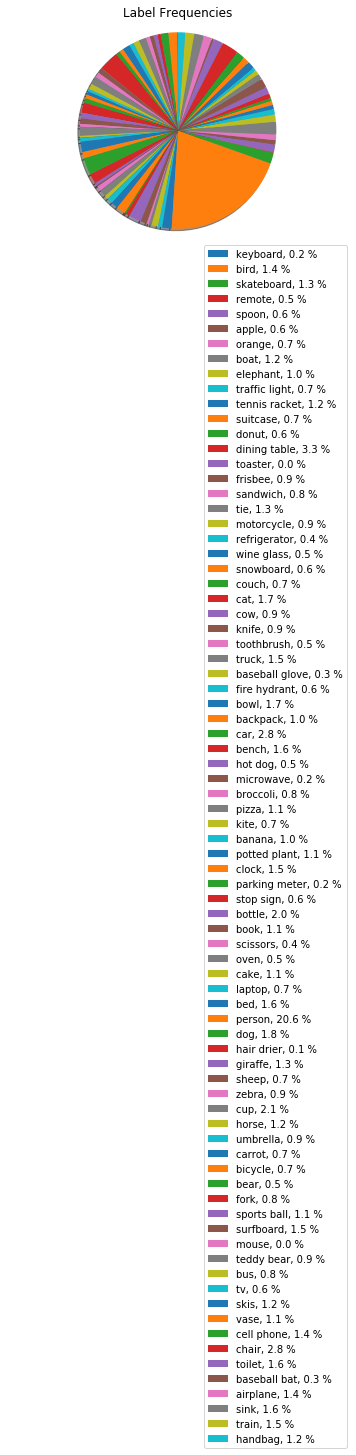

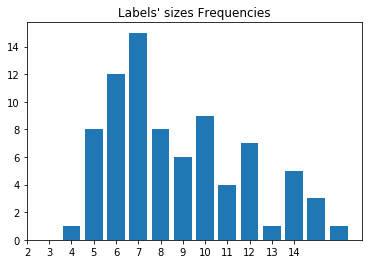

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_1
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_1/1_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_1/1_captions.txt


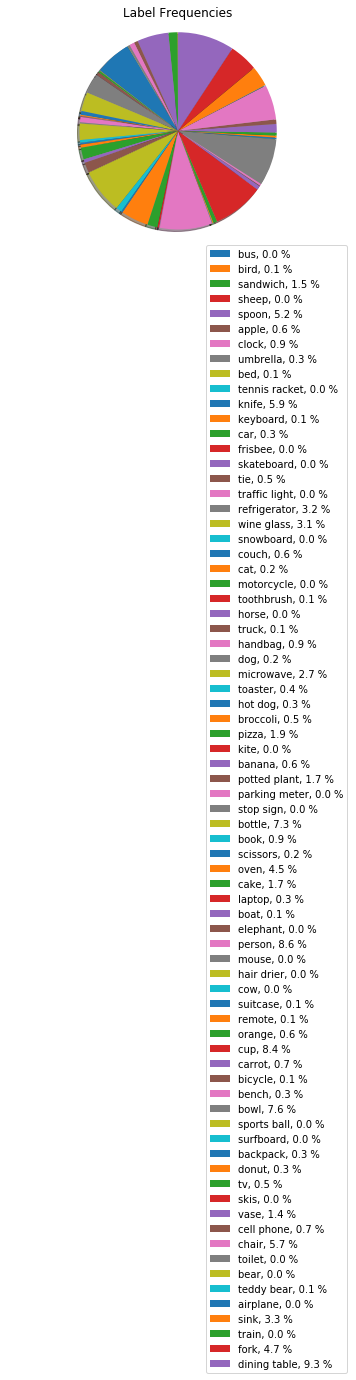

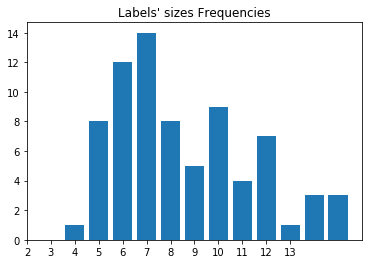

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_2
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_2/2_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_2/2_captions.txt


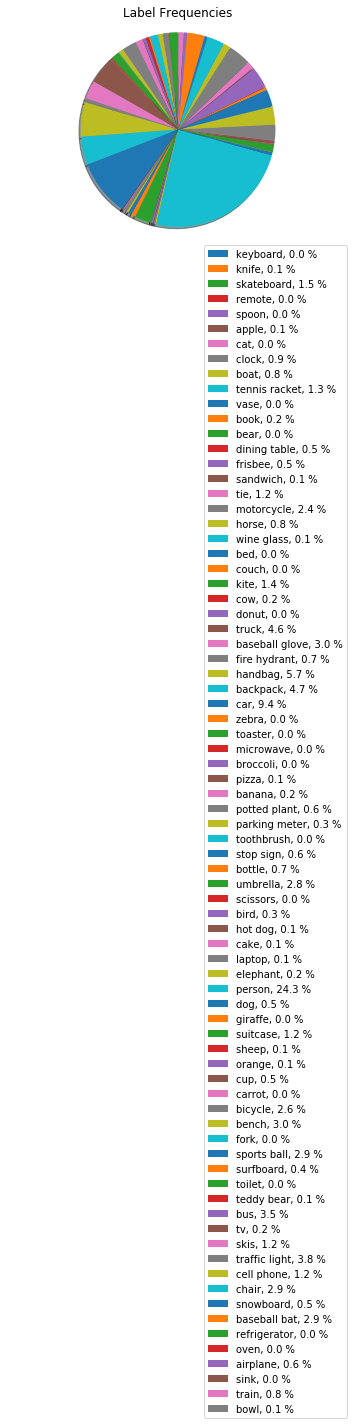

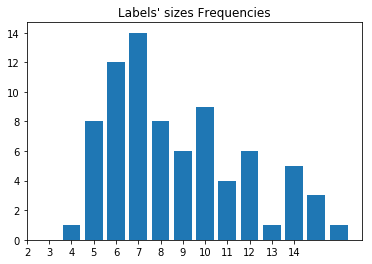

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_3
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_3/3_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_4_clusters/cluster_3/3_captions.txt


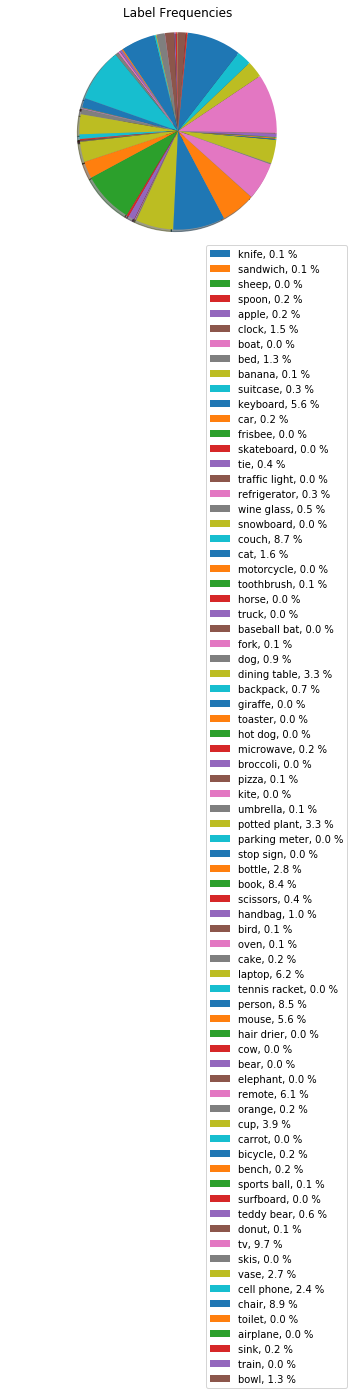

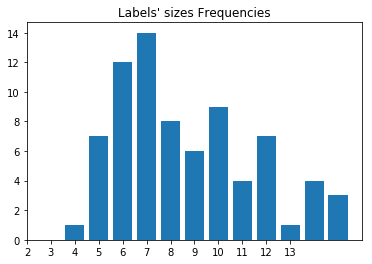

Cluster 5
pickled the model
	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_0
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_0/0_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_0/0_captions.txt


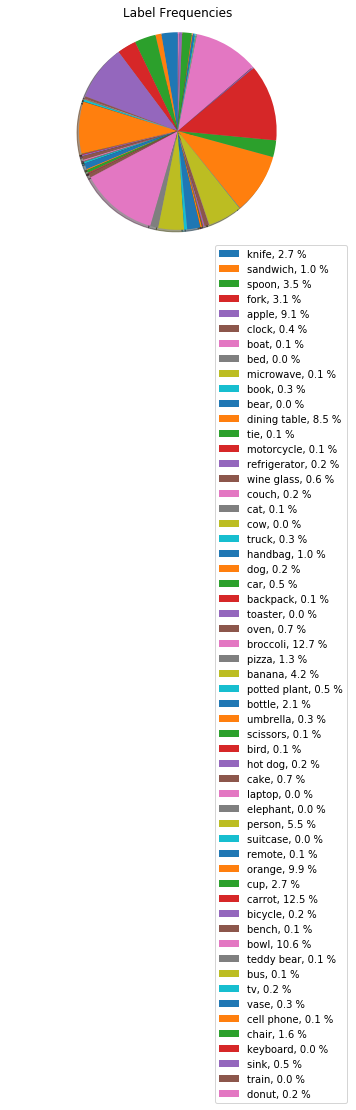

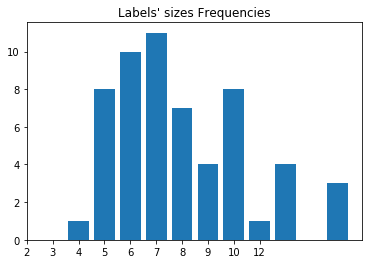

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_1
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_1/1_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_1/1_captions.txt


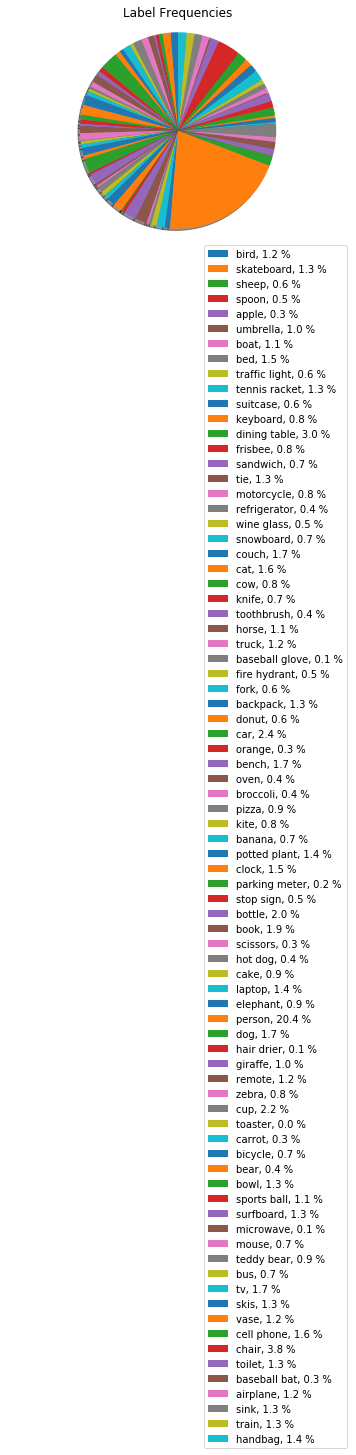

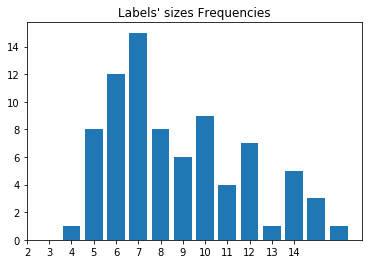

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_2
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_2/2_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_2/2_captions.txt


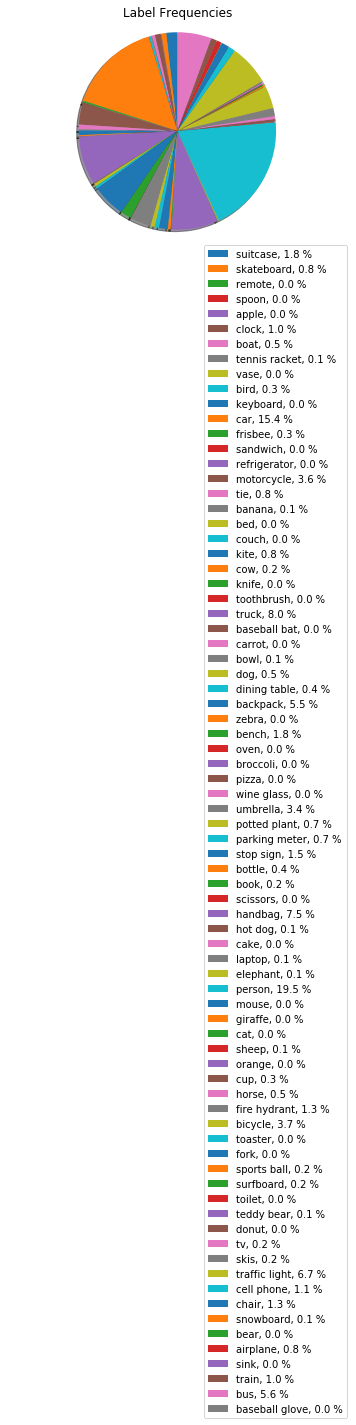

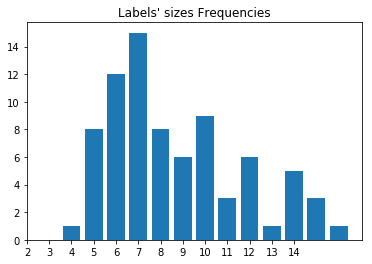

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_3
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_3/3_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_3/3_captions.txt


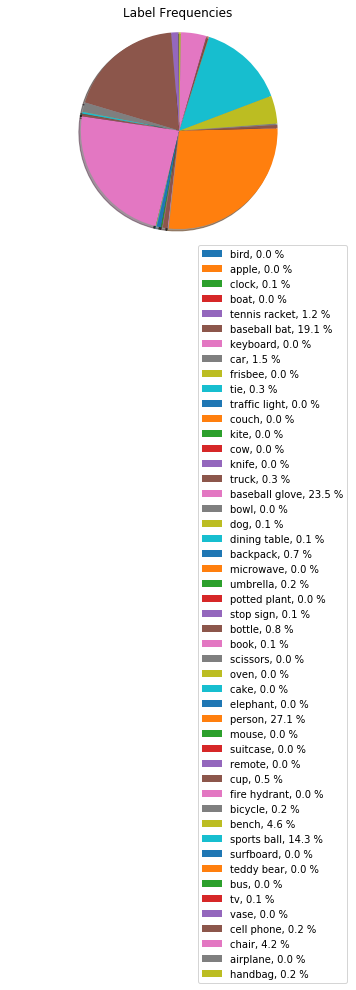

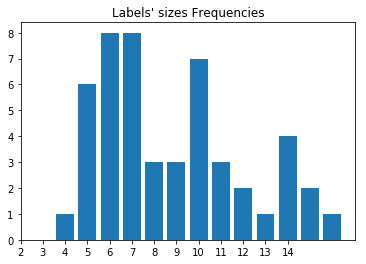

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_4
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_4/4_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_5_clusters/cluster_4/4_captions.txt


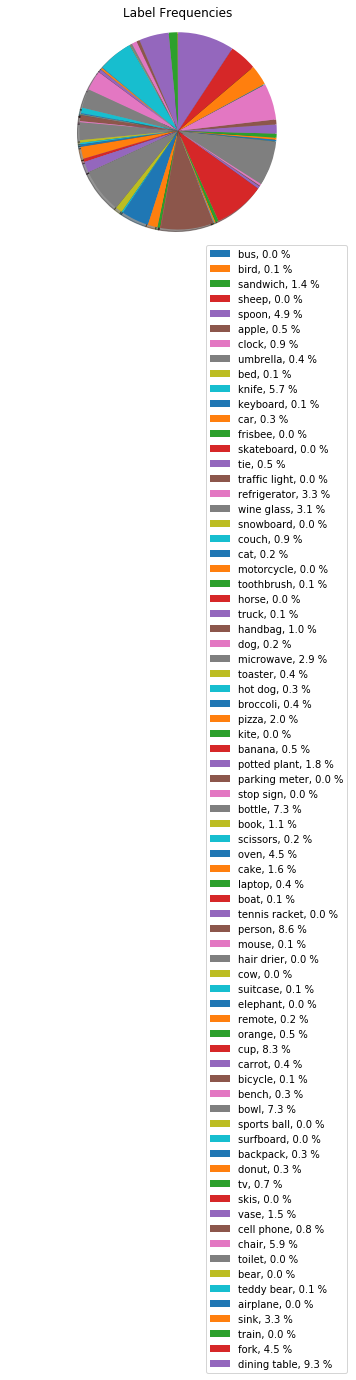

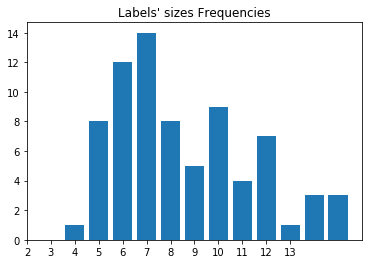

Cluster 6
pickled the model
	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_0
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_0/0_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_0/0_captions.txt


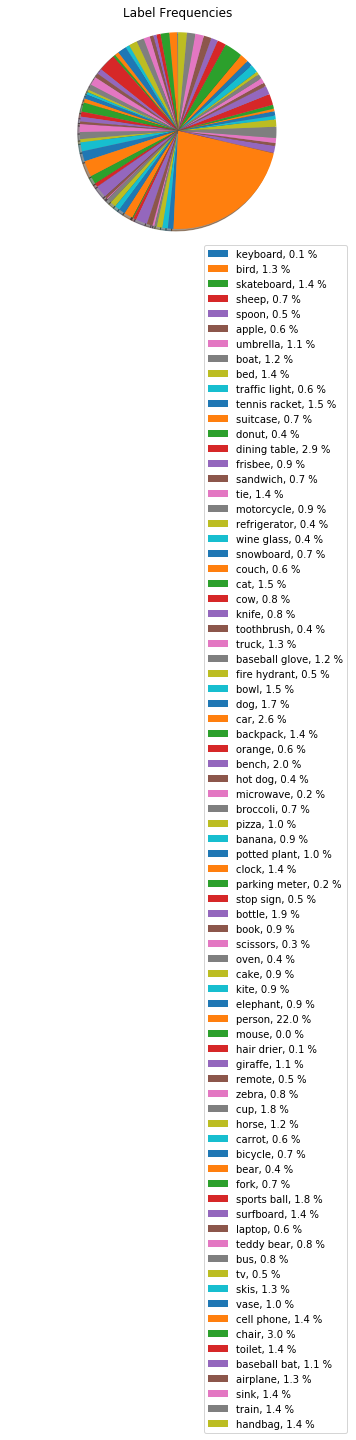

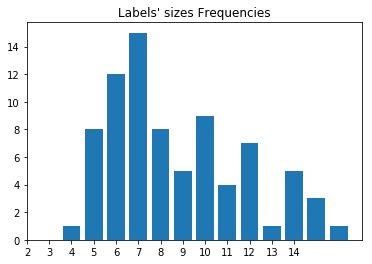

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_1
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_1/1_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_1/1_captions.txt


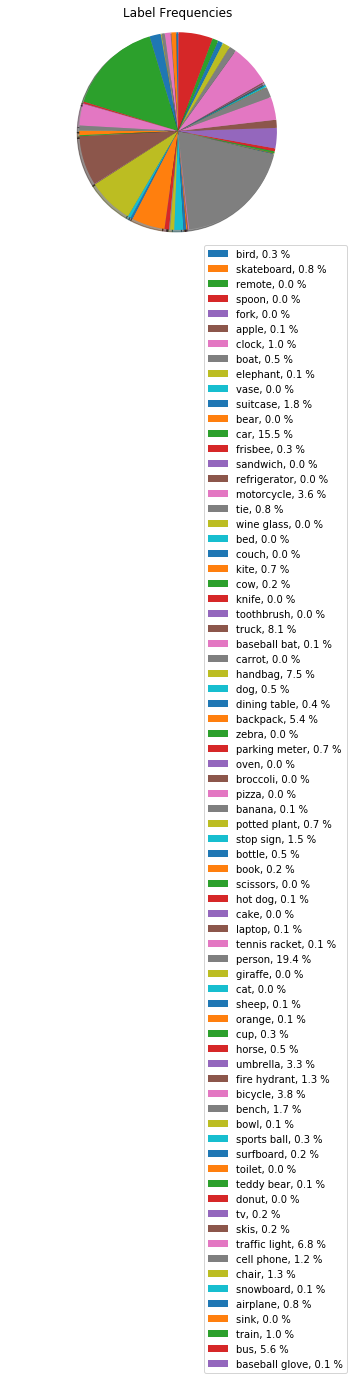

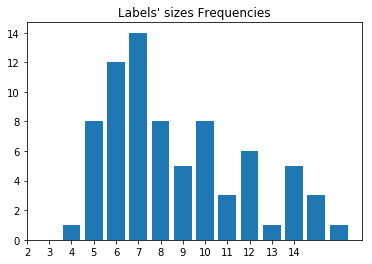

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_2
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_2/2_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_2/2_captions.txt


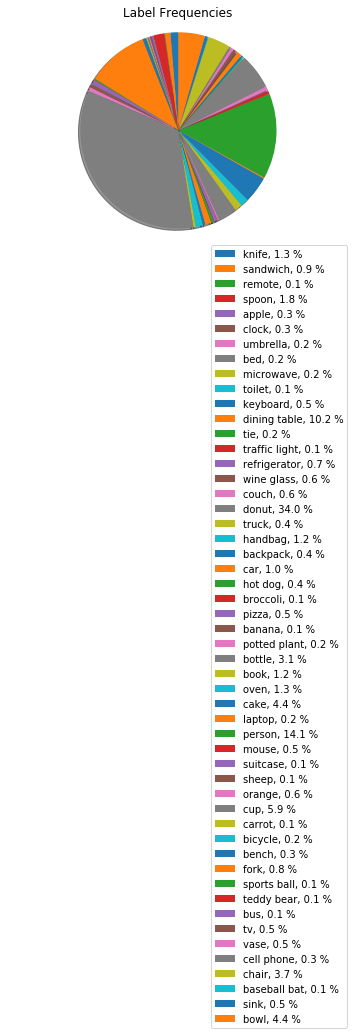

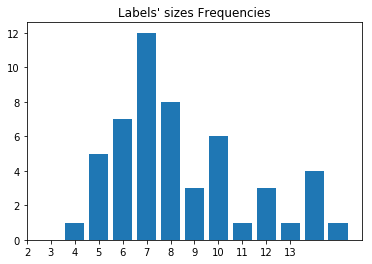

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_3
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_3/3_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_3/3_captions.txt


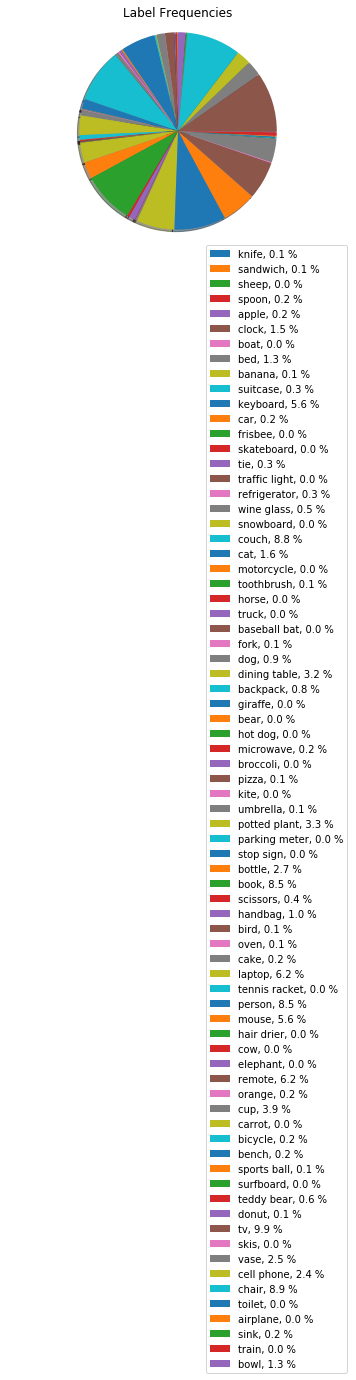

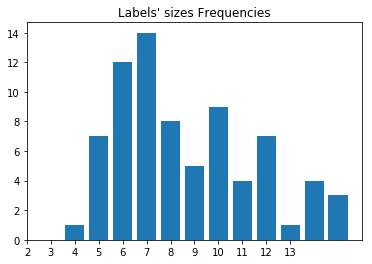

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_4
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_4/4_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_4/4_captions.txt


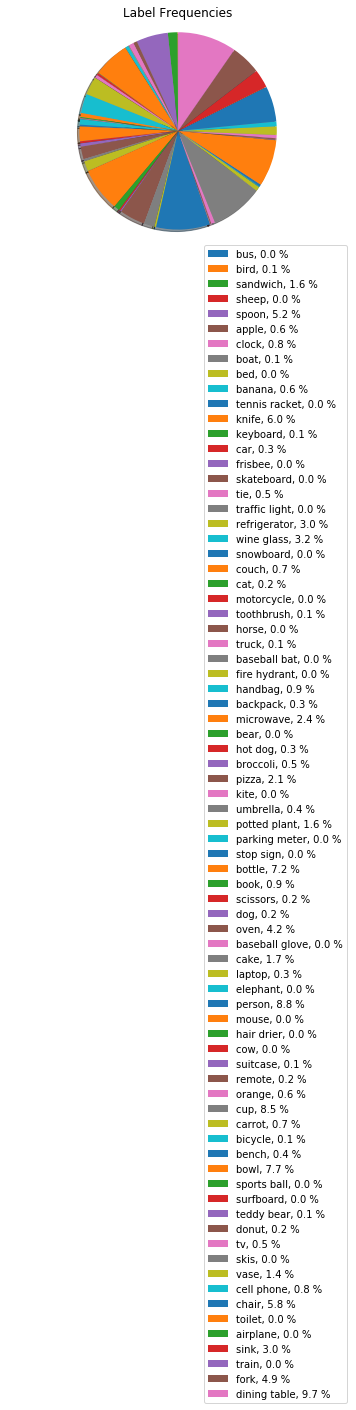

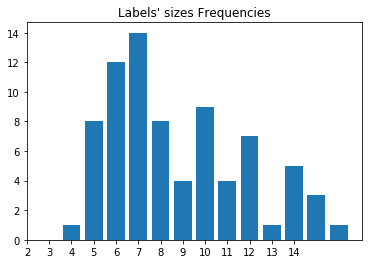

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_5
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_5/5_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_6_clusters/cluster_5/5_captions.txt


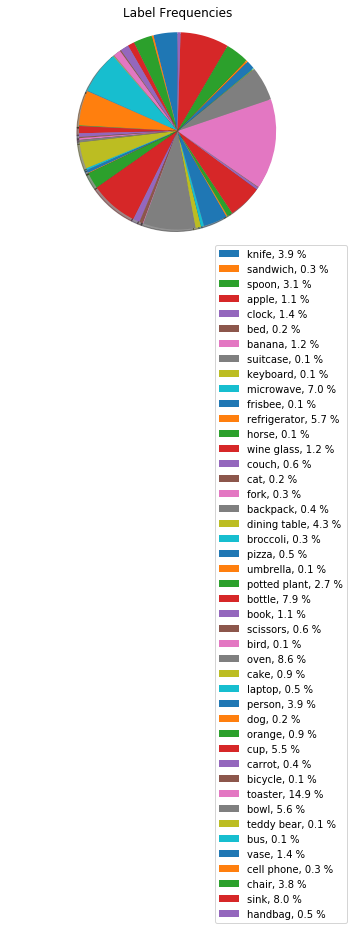

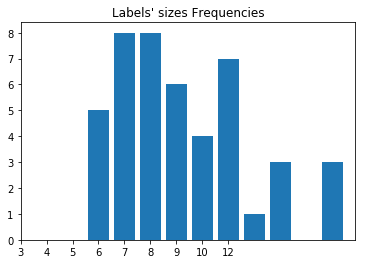

Cluster 7
pickled the model
	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_0
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_0/0_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_0/0_captions.txt


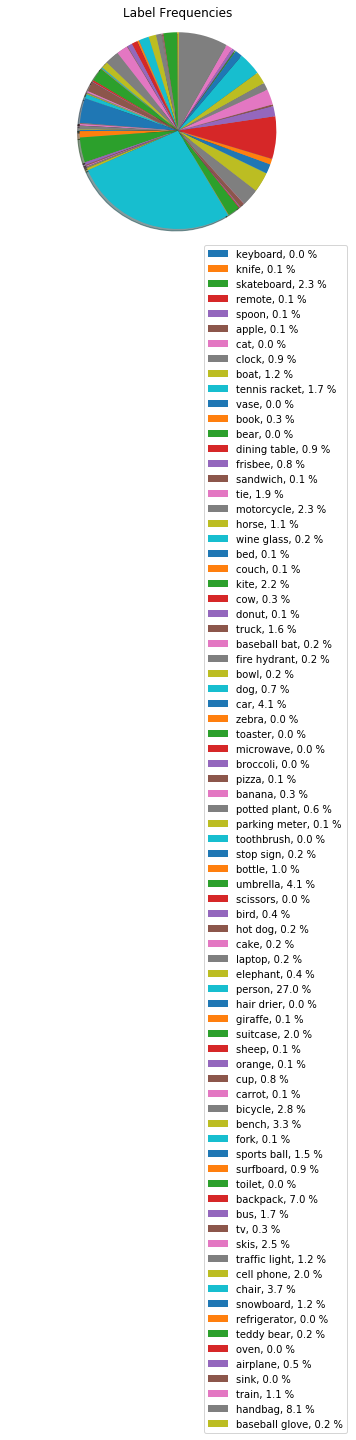

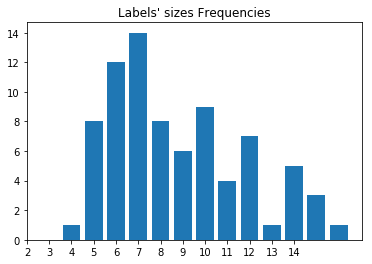

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_1
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_1/1_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_1/1_captions.txt


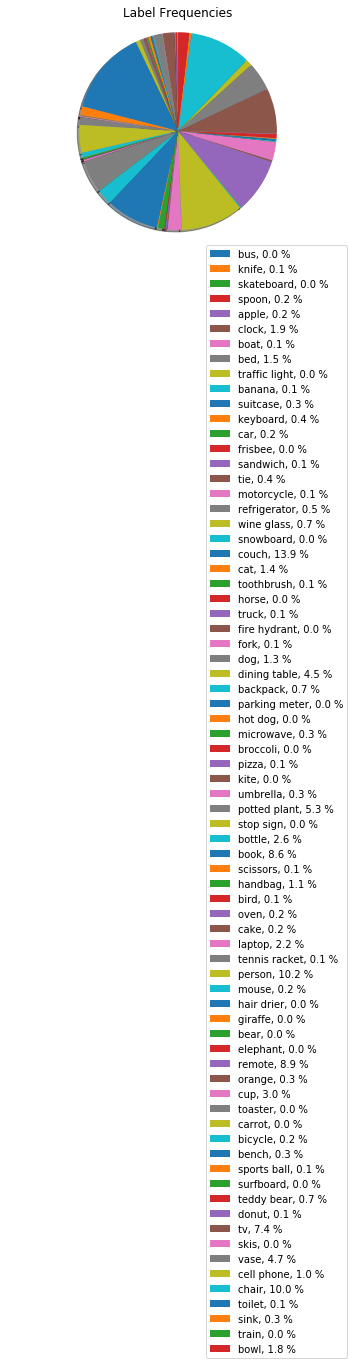

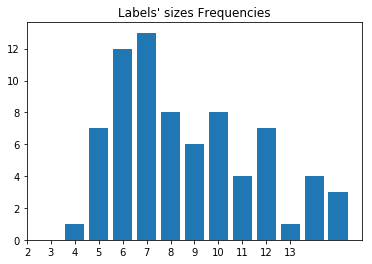

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_2
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_2/2_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_2/2_captions.txt


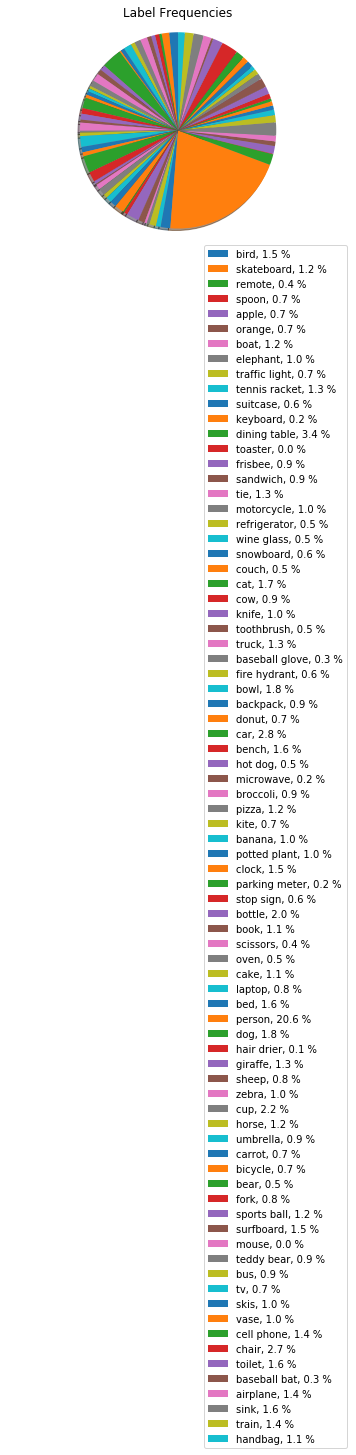

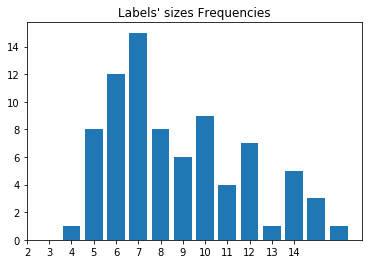

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_3
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_3/3_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_3/3_captions.txt


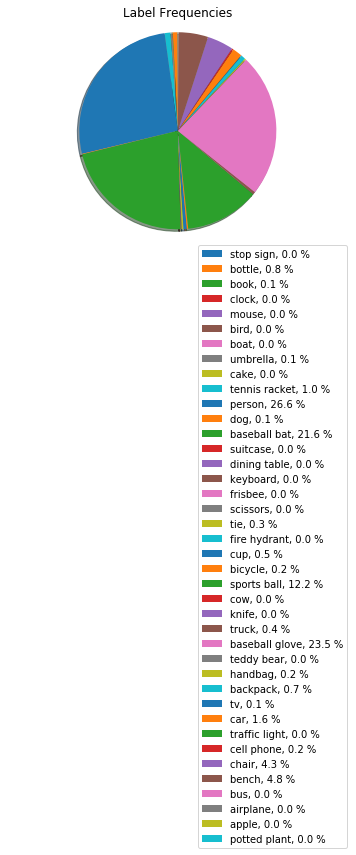

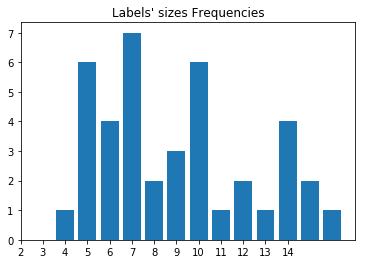

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_4
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_4/4_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_4/4_captions.txt


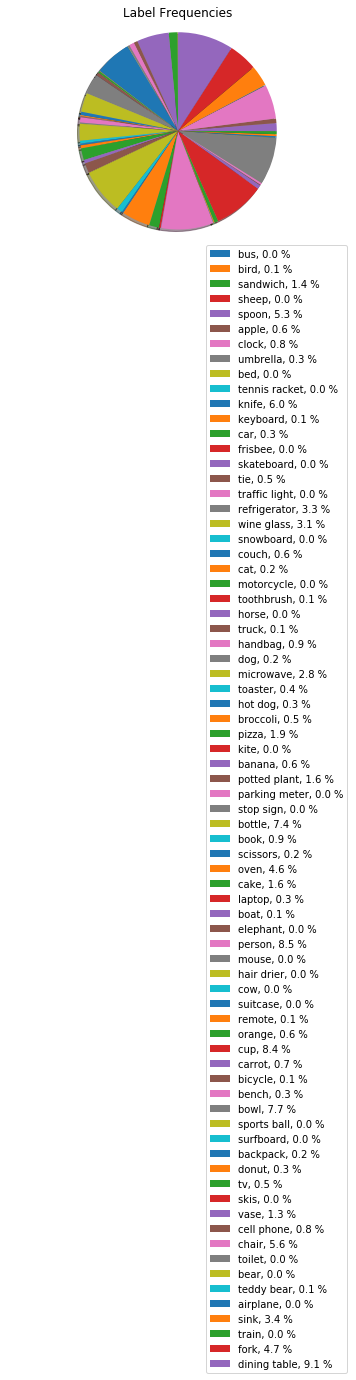

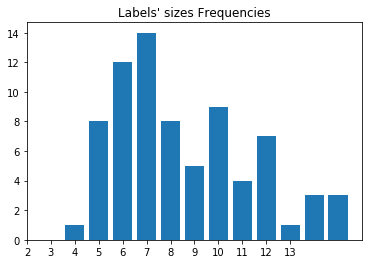

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_5
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_5/5_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_5/5_captions.txt


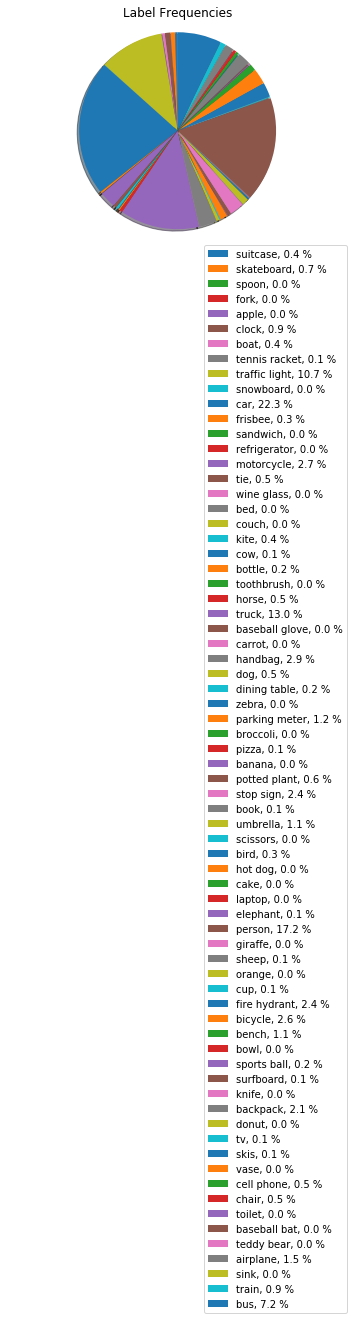

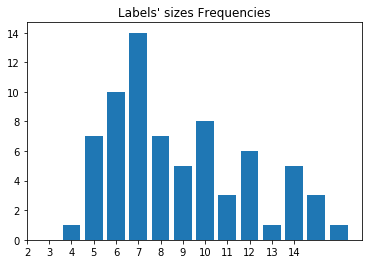

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_6
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_6/6_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_7_clusters/cluster_6/6_captions.txt


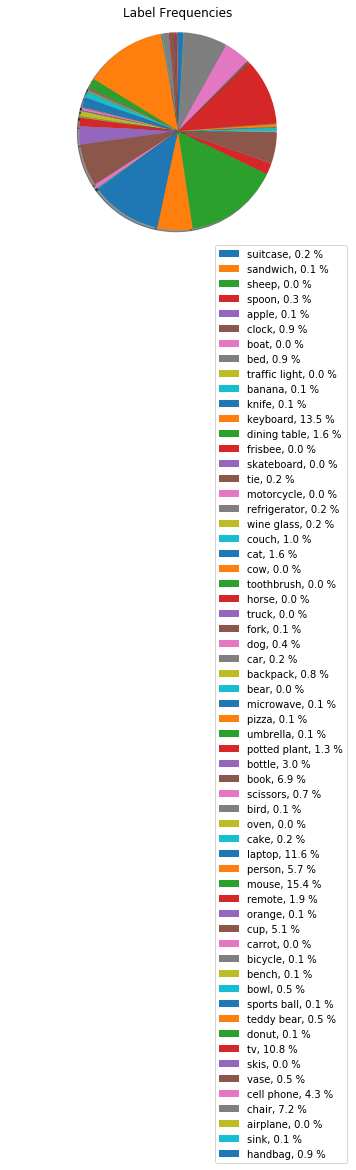

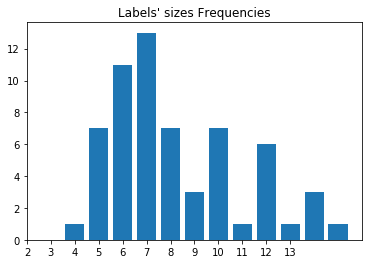

Cluster 8
pickled the model
	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_0
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_0/0_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_0/0_captions.txt


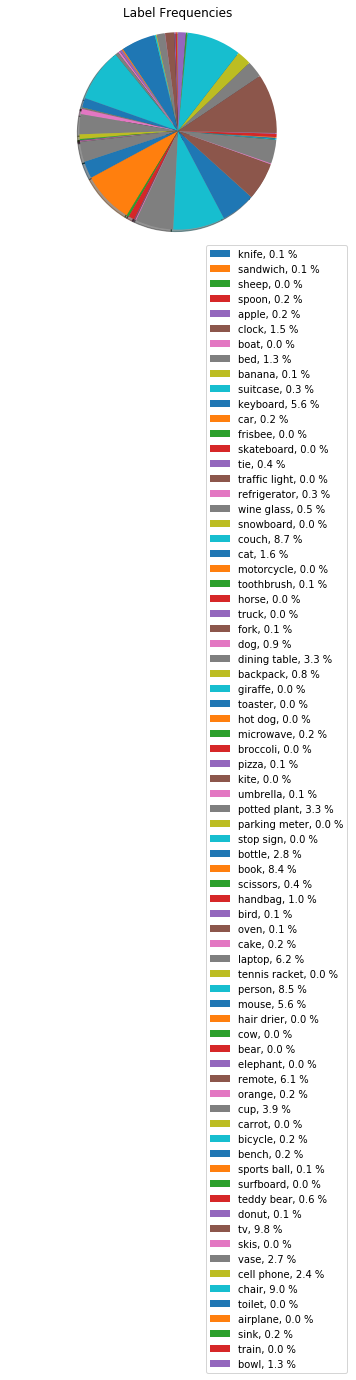

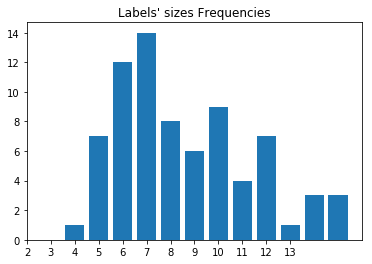

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_1
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_1/1_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_1/1_captions.txt


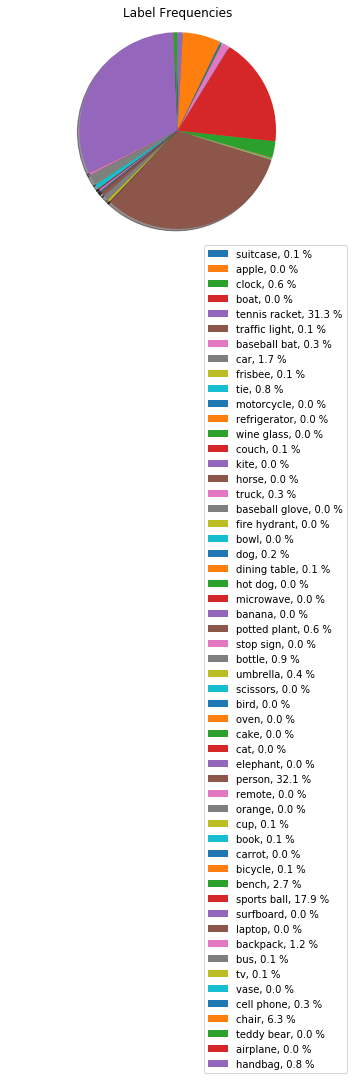

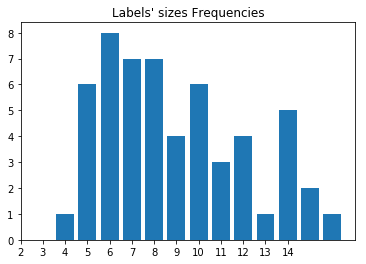

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_2
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_2/2_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_2/2_captions.txt


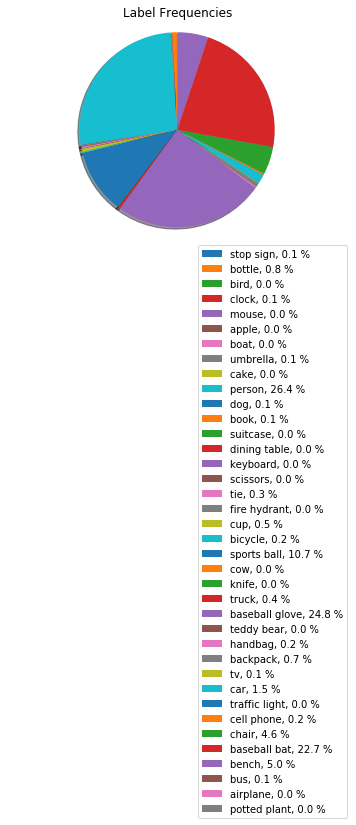

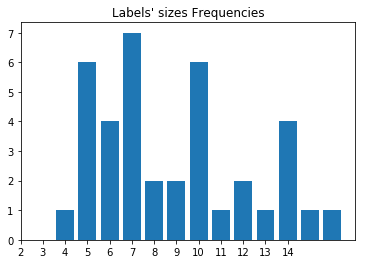

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_3
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_3/3_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_3/3_captions.txt


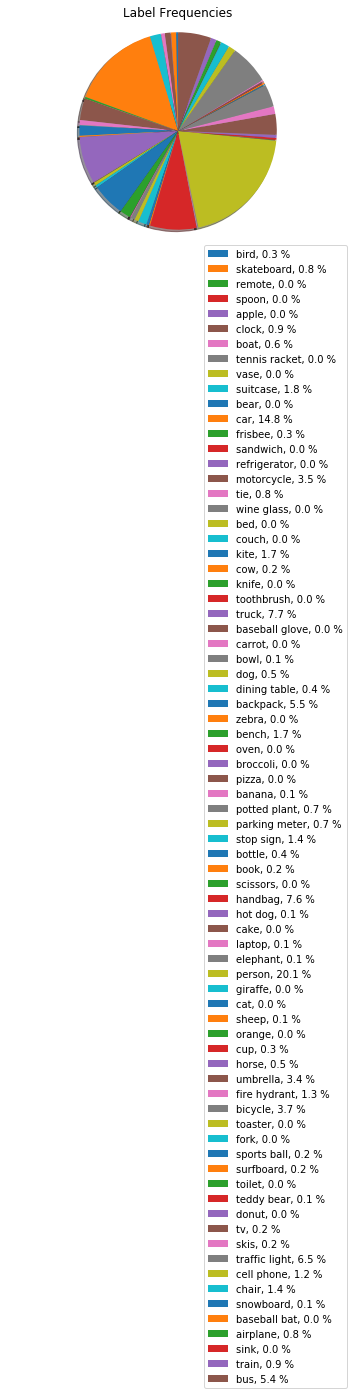

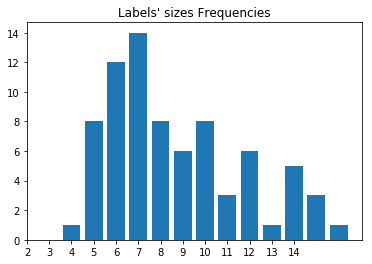

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_4
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_4/4_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_4/4_captions.txt


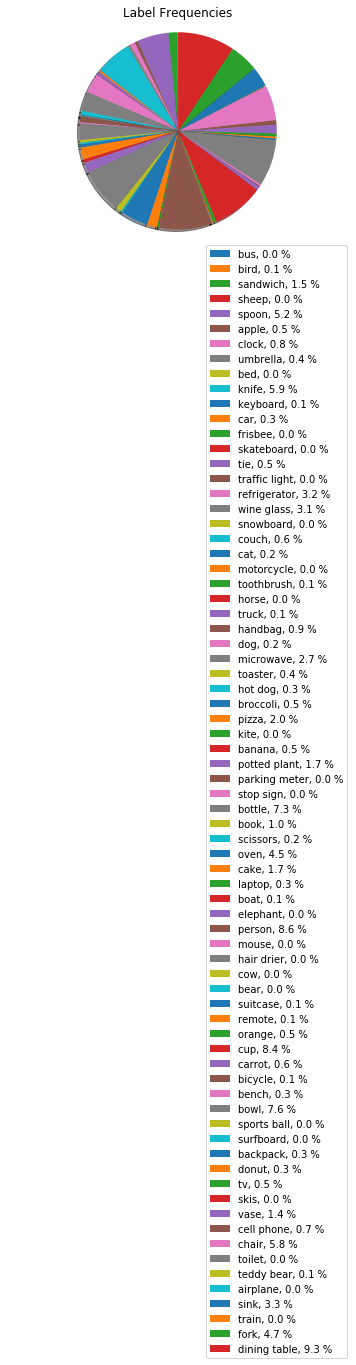

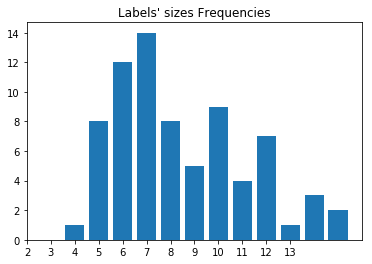

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_5
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_5/5_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_5/5_captions.txt


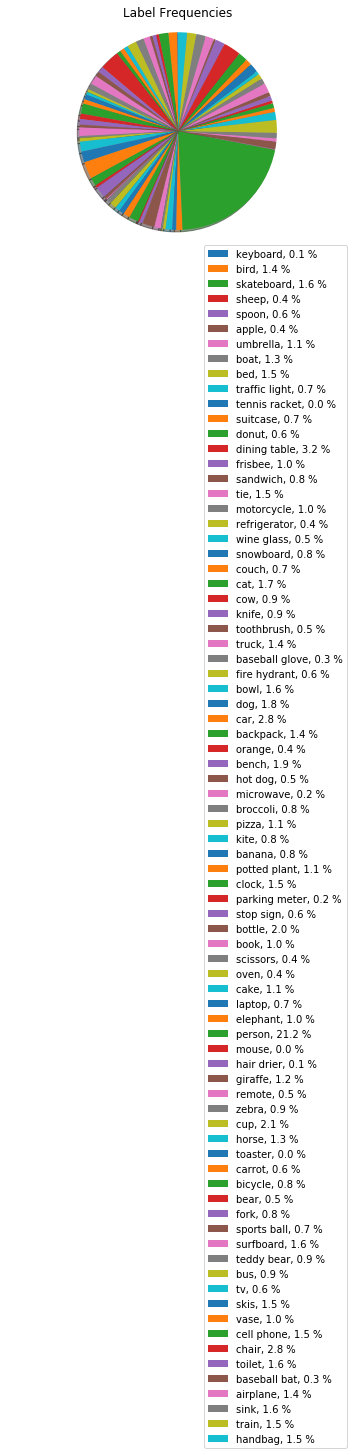

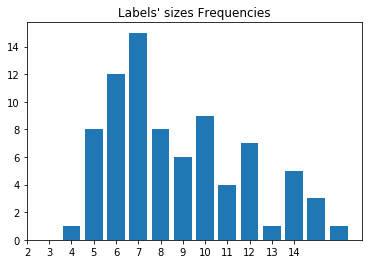

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_6
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_6/6_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_6/6_captions.txt


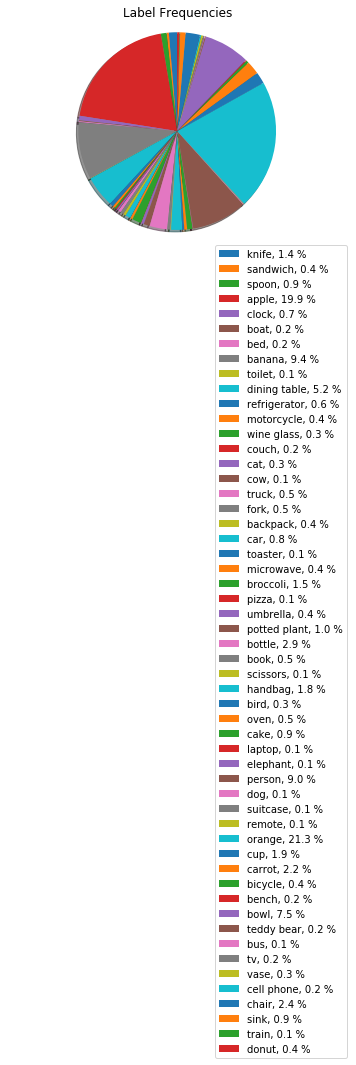

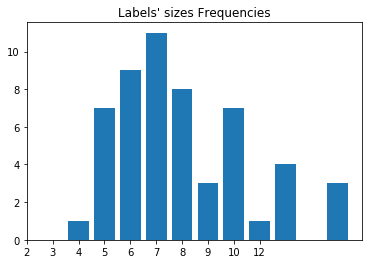

	Saving dir: /home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_7
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_7/7_labels.txt
/home/nourhan/Documents/kmOutput/KMeans/max_8_clusters/cluster_7/7_captions.txt


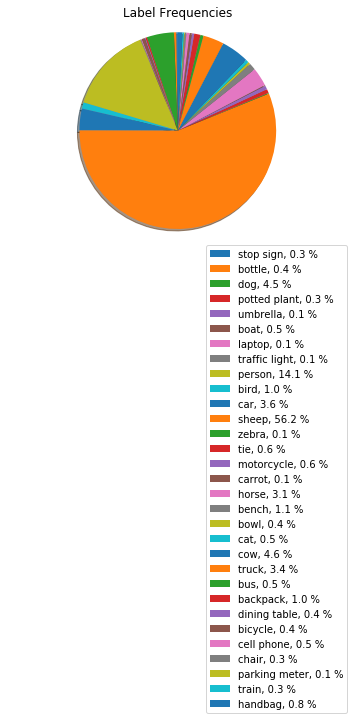

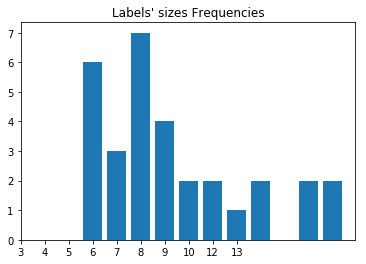

In [14]:
# KMeans, AgglomerativeClustering, FeatureAgglomeration
runKmeans(KMeans, norm_labels, filenames, captions, label_names, outputPath=kmOutputDir, modelNameUsed='KMeans', start=4, N=8)
# runKmeans(AgglomerativeClustering, labels, filenames, captions, label_names, outputPath=kmOutputDir, modelNameUsed='AgglomerativeClustering',start=4, N=4)
# runKmeans(FeatureAgglomeration, labels, filenames, captions, label_names, outputPath=kmOutputDir, modelNameUsed='FeatureAgglomeration',start=4, N=8)

In [18]:
for i in range(4, 9):
    c = FeatureAgglomeration(n_clusters=i)
    c.fit(norm_labels)

    res = c.transform(labels)
    print('%d clusters\n\t' % i)
    print(c.labels_)

4 clusters
	
[0 0 0 2 0 0 0 0 0 3 0 3 3 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0
 0 0 0 1 1 1]
5 clusters
	
[0 0 0 2 0 0 0 0 0 3 0 3 3 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 4 0 4 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 0 0 0 0 0 0 0 0 4 2 2 0 2 4 4 4 4 0 0
 0 0 4 1 1 1]
6 clusters
	
[0 0 0 5 0 0 0 0 0 3 0 3 3 0 1 0 0 1 0 0 1 0 0 0 2 0 0 0 4 0 4 1 1 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 2 3 3 3 3 3 3 0 0 0 0 0 0 0 0 4 5 5 0 5 4 4 4 4 0 0
 0 0 4 1 1 1]
7 clusters
	
[1 1 6 5 1 1 1 1 1 3 6 3 3 1 0 1 1 0 1 1 0 1 1 1 2 1 1 1 4 1 4 0 0 1 1 1 1
 1 1 1 1 1 1 1 2 2 1 1 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 4 5 5 6 5 4 4 4 4 6 6
 1 1 4 0 0 0]
8 clusters
	
[0 0 6 5 0 0 0 0 0 3 6 3 3 0 4 0 0 4 0 0 7 0 0 0 2 0 0 0 1 0 1 4 4 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 2 3 3 3 3 3 3 0 0 0 0 0 0 0 0 1 5 5 6 5 1 1 1 1 6 6
 0 0 1 7 7 7]
